In [1]:
from bs4 import BeautifulSoup as Soup #decode
import numpy as np #np.nan
import requests
import time #for time delay
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import copy
import re
import Carscraper8891 as scrap
import matplotlib.font_manager as font_manager

In [2]:
#Database
df_car = pd.read_csv("./df_car_info.csv")


In [3]:
df_car

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7215,3802499,山葉/Yamaha,VINOORA 125,黑色,3,0.1,6400.0,原漆 土除 液晶面板,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,62000.0
7216,3802494,三陽/SYM,迪爵 125,灰色,3,0.1,15200.0,原漆,Hello~我們是笛加車業 LINE ID ：@djcar 找車問笛加(DJc...,45000.0
7217,3802474,光陽/KYMCO,Many110,藍色,4,0.1,19000.0,NaN,廠牌/ 車型：光陽 many 魅力110 英倫版 出場日：2020 排氣量：1...,46000.0
7218,3801784,山葉/Yamaha,勁豪125/AXIS Z,灰色,7,0.1,12000.0,原漆,未說明,35000.0


# Scrap and Update database

In [4]:
# Scrap and Update database
reload(scrap)
car_scaper = scrap.CarScraper(df_car)
df_new_car_info = car_scaper.new_scraped(90)

init
scraping 1 / 3 page
added 3817563
added 3817241
This ID has already scraped
This ID has already scraped
This ID has already scraped
added 3816597
added 3816516
added 3816490
added 3816487
added 3811713
added 3811700
added 3711805
added 3813892
added 3813784
added 3813615
added 3813614
added 3812197
added 3812904
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
added 3807451
scraping 2 / 3 page
added 3807452
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
added 3812881
added 3812635
added 3811841
added 3811789
added 3810244
added 3807413
added 3807412
added 3807410
added 3807406
add

In [5]:
# simply clean the data
df_new_car_info = car_scaper.clean_df(df_new_car_info)

In [6]:
df_new_car_info

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3817563,光陽/KYMCO,雷霆 S150/Racing S150,白色,1,0.1,970000.0,原漆 ABS 液晶面板 TCS,【杰運機車】2023 KYMCO RCS MOTO 150 TCS LED 魚...,96000.0
1,3817241,光陽/KYMCO,Many110,綠色,8,0.1,34600.0,,全車重新烤漆 原廠色系,36000.0
2,3816597,Gogoro,S2,黑色,6,0.0,26000.0,,未說明,38000.0
3,3816516,山葉/Yamaha,R15,黑色,6,0.2,20300.0,,未說明,60000.0
4,3816490,三陽/SYM,Jet Power Evo,其他,4,0.1,30700.0,,未說明,62000.0
5,3816487,三陽/SYM,Z1,灰色,4,0.1,22500.0,,未說明,45000.0
6,3811713,山葉/Yamaha,勁豪125/AXIS Z,藍色,6,0.1,14000.0,,2018山葉YAMAHA勁豪125cc 整台出廠原漆 勤保養 外觀極新 ...,29000.0
7,3811700,光陽/KYMCO,FAMOUS 新名流 125,黑色,4,0.1,16000.0,,2020年光陽KYMCO 新名流125cc 頂規版 ABS 碟煞系統 液晶顯...,35000.0
8,3711805,亞帝發/Adiva,AD3,白色,1,0.1,NaN,,未說明,NaN
9,3813892,其他廠牌,other,其他,1,NaN,0.0,,1.Gogoro現有車系最佳離地高（14.2 公分） 2.設計負重規格高達 ...,70000.0


In [7]:
#Save thd new-scraped data into database
new_df_car_info = car_scaper.Update_database(df_new_car_info,'./df_car_info.csv')
new_df_car_info

Add 29, From 7220 to 7249


,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7244,3807410,其他廠牌,other,其他,5,NaN,10000.0,,加LINE官方 @tycar 馬上線上賞車,29000.0
7245,3807406,Gogoro,S2,白色,3,0.0,18000.0,原漆 土除 皮椅 ABS 中控鎖 液晶面板 行車電腦 液晶儀錶 晶片鑰匙 後車箱 碳纖維篩板...,加LINE官方 @tycar 馬上線上賞車,42000.0
7246,3807107,其他廠牌,other,紫色,1,NaN,0.0,,車輛所在：嘉義市 車輛顏色：靈魂紫 出場日期：2023，9 月 原價價格：$7...,65000.0
7247,3806582,三陽/SYM,Jet S,藍色,9,0.1,2322.0,原漆 皮椅 ABS 中控鎖 液晶面板 行車電腦 駐車架 液晶儀錶 晶片鑰匙 後車箱 碳纖維篩...,我在台中接聽買賣車的事情~ 我留我的電話接洽 我親姐夫再高雄有一台2015年...,37000.0


# Observation

In [8]:
new_df_car_info.describe()

,used year,gas,mileage,price
count,7249.000000,7017.000000,5949.000000,7.236000e+03
mean,12.390261,0.177840,26814.081281,6.717585e+04
std,5.340128,0.284572,55062.879191,1.213288e+05
min,0.000000,0.000000,0.000000,1.000000e+03
25%,9.000000,0.100000,7500.000000,2.500000e+04
50%,12.000000,0.100000,15000.000000,3.600000e+04
75%,15.000000,0.100000,30000.000000,5.500000e+04
max,33.000000,6.000000,970000.000000,1.600000e+06


In [9]:
new_df_car_info['price'].mean(),new_df_car_info['price'].median(),new_df_car_info['price'].mode()

(67175.85222498619,
 36000.0,
 0    25000.0
 dtype: float64)

In [10]:
new_df_car_info['Company'].unique()

array(['比雅久/PGO', '三陽/SYM', '山葉/Yamaha', '光陽/KYMCO', '本田/HONDA',
       '川崎/Kawasaki', 'Gogoro', '其他廠牌', '臺鈴/Suzuki', '哈特佛/Hartford',
       '哈雷/Harley', 'Victory', 'SUZUKI', '永豐/YuenFoong', '偉士牌/Vespa',
       '杜卡迪/Ducati', 'BMW', '豪邁', 'KTM', 'Benelli/倍力尼', '宏佳騰',
       '亞帝發/Adiva', 'Aprilia', '捷穎/CPI', 'TRIUMPH', 'ZERO', 'BSA',
       'MVAgusta', '台灣摩托', '必翔'], dtype=object)

In [12]:
len(new_df_car_info[new_df_car_info['used year']>8])

5679

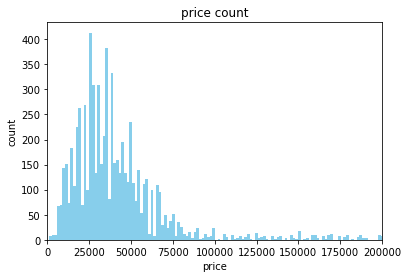

In [13]:
plt.Figure(figsize=(50,25))
plt.hist(new_df_car_info['price'],bins = 1000, color = 'skyblue')
plt.xlim(0,200000)
plt.xlabel('price')
plt.ylabel('count')
plt.title('price count')
plt.show()

findfont: Font family ['/Users/tamchonman/Documents/NTU/Reasrch/LCOC_Taiwan/微软正黑体.ttf'] not found. Falling back to DejaVu Sans.


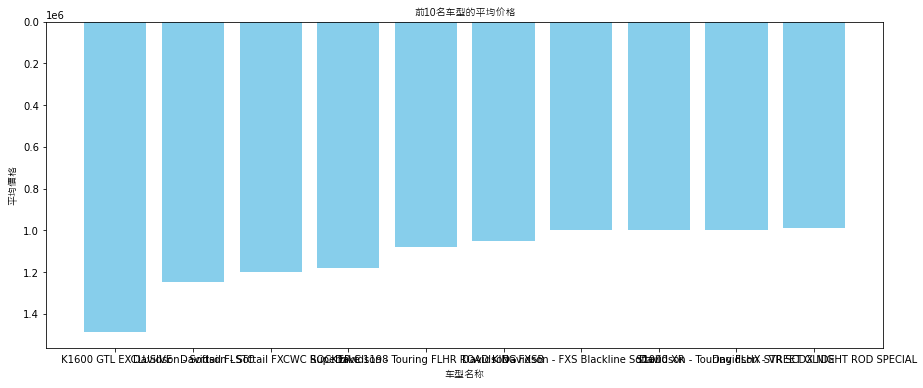

In [14]:
df_car_info = new_df_car_info
font_path = '/Users/tamchonman/Documents/NTU/Reasrch/LCOC_Taiwan/微软正黑体.ttf'

font_prop = font_manager.FontProperties(fname=font_path)

# 统计每个名字对应的平均价格
name_price_mean = df_car_info.groupby('Model')['price'].mean().reset_index()

# 排序数据，按平均价格降序排列
name_price_mean = name_price_mean.sort_values(by='price', ascending=False)

# 取前 10 个名字和价格
top_10_names = name_price_mean.head(10)

# 绘制统计图
plt.rc('font', family=font_path)
plt.figure(figsize=(15, 6))
plt.bar(top_10_names['Model'], top_10_names['price'], color='skyblue')
plt.xlabel('车型名称',fontproperties=font_prop)
plt.ylabel('平均價格',fontproperties=font_prop)
plt.title('前10名车型的平均价格',fontproperties=font_prop)
plt.gca().invert_yaxis()  # 翻转 y 轴，使价格高的显示在顶部
plt.show()

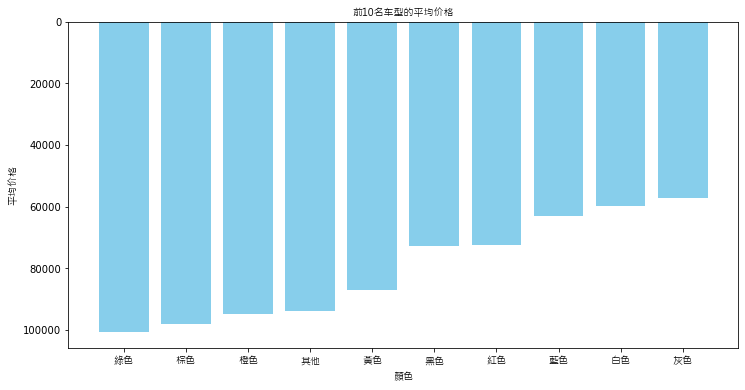

In [15]:
# 统计每个名字对应的平均价格
color_price_mean = df_car_info.groupby('Color')['price'].mean().reset_index()

# 排序数据，按平均价格降序排列
color_price_mean = color_price_mean.sort_values(by='price', ascending=False)

# 取前 10 个名字和价格
top_10_color = color_price_mean[0:10]

# 绘制统计图
plt.figure(figsize=(12, 6))
plt.bar(top_10_color['Color'], top_10_color['price'], color='skyblue')
plt.xticks(fontproperties=font_prop)
plt.ylabel('平均价格', fontproperties=font_prop)
plt.xlabel('顏色', fontproperties=font_prop)
plt.title('前10名车型的平均价格',fontproperties=font_prop)
plt.gca().invert_yaxis()  # 翻转 y 轴，使价格高的显示在顶部
plt.show()

findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.


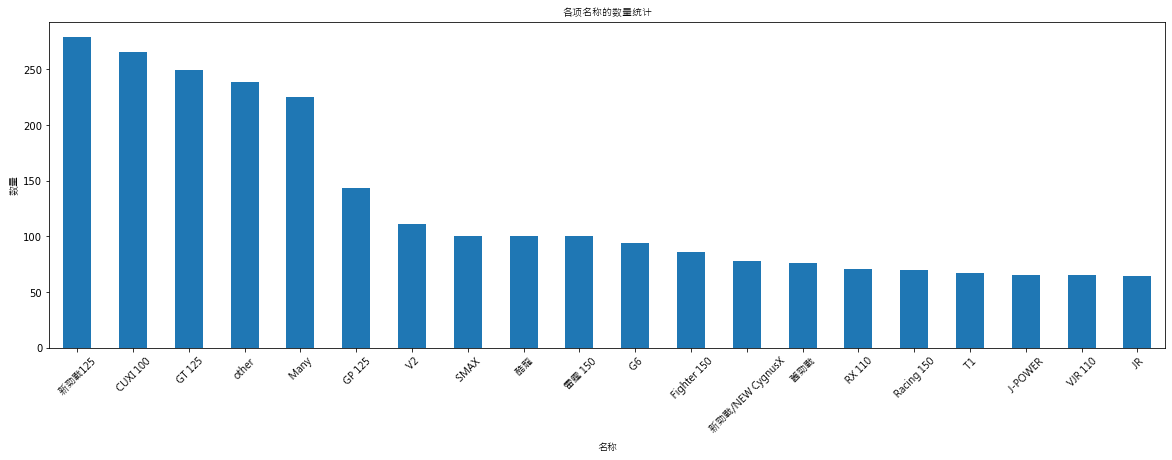

In [16]:
name_counts = df_car_info['Model'].value_counts().head(20)

plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(20, 6))
name_counts.plot(kind='bar')
plt.xticks(fontproperties=font_prop)
plt.xlabel('名称',fontproperties=font_prop)
plt.ylabel('数量',fontproperties=font_prop)
plt.title('各项名称的数量统计',fontproperties=font_prop)
plt.xticks(rotation=45)
plt.show()

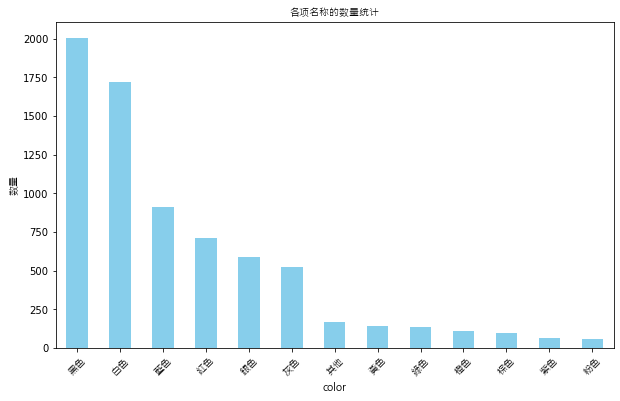

In [17]:
color_counts = df_car_info['Color'].value_counts()

plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.xticks(fontproperties=font_prop)
plt.xlabel('color',fontproperties=font_prop)
plt.ylabel('数量',fontproperties=font_prop)
plt.title('各项名称的数量统计',fontproperties=font_prop)
plt.xticks(rotation=45)
plt.show()

# Mechaine Learning Part

## Missing Vaule

In [18]:
Data_X = new_df_car_info.copy()
Data_X

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7244,3807410,其他廠牌,other,其他,5,NaN,10000.0,,加LINE官方 @tycar 馬上線上賞車,29000.0
7245,3807406,Gogoro,S2,白色,3,0.0,18000.0,原漆 土除 皮椅 ABS 中控鎖 液晶面板 行車電腦 液晶儀錶 晶片鑰匙 後車箱 碳纖維篩板...,加LINE官方 @tycar 馬上線上賞車,42000.0
7246,3807107,其他廠牌,other,紫色,1,NaN,0.0,,車輛所在：嘉義市 車輛顏色：靈魂紫 出場日期：2023，9 月 原價價格：$7...,65000.0
7247,3806582,三陽/SYM,Jet S,藍色,9,0.1,2322.0,原漆 皮椅 ABS 中控鎖 液晶面板 行車電腦 駐車架 液晶儀錶 晶片鑰匙 後車箱 碳纖維篩...,我在台中接聽買賣車的事情~ 我留我的電話接洽 我親姐夫再高雄有一台2015年...,37000.0


In [19]:
Data_X.shape

(7249, 10)

In [20]:
Data_X =Data_X.drop(columns='car_id')
Data_X =Data_X.drop(columns='Company')
Data_X =Data_X.drop(columns='Outfit')
Data_X =Data_X.drop(columns='detail')
Data_X

,Model,Color,used year,gas,mileage,price
0,Alpha Max 125,綠色,5,0.1,12900.0,36000.0
1,迪爵 125,灰色,4,0.1,32100.0,40000.0
2,迪爵 125,藍色,4,0.1,30300.0,35000.0
3,GTR AERO,白色,11,0.1,24100.0,26000.0
4,勁豪125/AXIS Z,黑色,3,0.1,18000.0,41000.0
...,...,...,...,...,...,...
7244,other,其他,5,NaN,10000.0,29000.0
7245,S2,白色,3,0.0,18000.0,42000.0
7246,other,紫色,1,NaN,0.0,65000.0
7247,Jet S,藍色,9,0.1,2322.0,37000.0


In [21]:
Data_X.isna().sum()

Model           0
Color           0
used year       0
gas           232
mileage      1300
price          13
dtype: int64

findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.


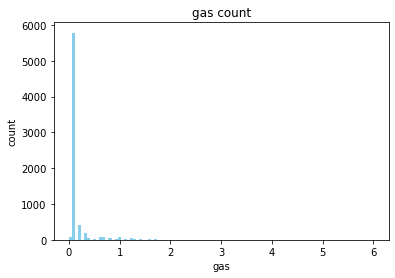

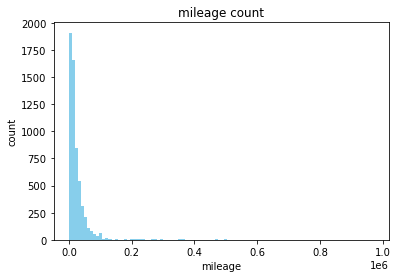

In [22]:
features = ['gas','mileage']

for feature in features:
    plt.Figure(figsize=(50,25))
    plt.hist(Data_X[feature],bins = 100, color = 'skyblue')
    # plt.xlim(0,2)
    plt.xlabel(f'{feature}')
    plt.ylabel('count')
    plt.title(f'{feature} count')
    plt.show()

In [23]:
gas_mean = Data_X['gas'].mean()
gas_median =Data_X['gas'].median()
gas_mode = Data_X['gas'].mode()

print(f'Gas mean: {gas_mean:.4f} \nGas median: {gas_median:.4f} \nGas mode: {gas_mode.iloc[0]:.4f}')

Gas mean: 0.1778 
Gas median: 0.1000 
Gas mode: 0.1000


In [24]:
#Gas 缺失
Data_X['gas'] = Data_X['gas'].fillna(gas_median)

Data_X.isna().sum()

Model           0
Color           0
used year       0
gas             0
mileage      1300
price          13
dtype: int64

In [25]:
mileage_mean =Data_X['mileage'].mean()
mileage_median =Data_X['mileage'].median()
mileage_mode = Data_X['mileage'].mode().iloc[0]

print(f'mileage mean: {mileage_mean:.4f} \nmileage median: {mileage_median:.4f} \nmileage mode: {mileage_mode:.4f}')

mileage mean: 26814.0813 
mileage median: 15000.0000 
mileage mode: 20000.0000


In [26]:
#mileage 缺失
Data_X['mileage'].fillna(mileage_mode, inplace= True)

print(Data_X.isna().sum())

Model         0
Color         0
used year     0
gas           0
mileage       0
price        13
dtype: int64


In [27]:
Data_X = Data_X.dropna(subset=['price'])
print(Data_X.isna().sum())

Model        0
Color        0
used year    0
gas          0
mileage      0
price        0
dtype: int64


In [28]:
len(Data_X['Model'].unique())

569

In [29]:
Data = Data_X.copy()
Data['price'] = Data['price']/10000

In [30]:
Data

,Model,Color,used year,gas,mileage,price
0,Alpha Max 125,綠色,5,0.1,12900.0,3.6
1,迪爵 125,灰色,4,0.1,32100.0,4.0
2,迪爵 125,藍色,4,0.1,30300.0,3.5
3,GTR AERO,白色,11,0.1,24100.0,2.6
4,勁豪125/AXIS Z,黑色,3,0.1,18000.0,4.1
...,...,...,...,...,...,...
7244,other,其他,5,0.1,10000.0,2.9
7245,S2,白色,3,0.0,18000.0,4.2
7246,other,紫色,1,0.1,0.0,6.5
7247,Jet S,藍色,9,0.1,2322.0,3.7


<AxesSubplot:>

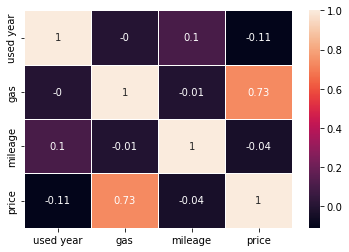

In [31]:
import seaborn as sns
correlation_matrix = Data.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

# Feature Engineering

In [32]:
# Encoder
# 使用 pandas 的 get_dummies 方法進行獨熱編碼
Data = pd.get_dummies(Data, columns=['Model'])
Data = pd.get_dummies(Data, columns=['Color'])

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# Data['Model'] = label_encoder.fit_transform(Data['Model'])
Data

,used year,gas,mileage,price,Model_ (特仕版)/JR,Model_ 1190 Adventure,Model_ 150cc,Model_ 2,Model_ 2 Plus,Model_ 3 Plus,...,Color_灰色,Color_白色,Color_粉色,Color_紅色,Color_紫色,Color_綠色,Color_藍色,Color_銀色,Color_黃色,Color_黑色
0,5,0.1,12900.0,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,0.1,32100.0,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,0.1,30300.0,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11,0.1,24100.0,2.6,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,0.1,18000.0,4.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,5,0.1,10000.0,2.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245,3,0.0,18000.0,4.2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7246,1,0.1,0.0,6.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7247,9,0.1,2322.0,3.7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
#Standardlize
from sklearn.preprocessing import StandardScaler

# 創建一個 StandardScaler 對象
scaler = StandardScaler()

# 將 'mileage' 列標準化
Data['mileage'] = scaler.fit_transform(Data[['mileage']])
# Data['gas'] = scaler.fit_transform(Data[['gas']])
Data

,used year,gas,mileage,price,Model_ (特仕版)/JR,Model_ 1190 Adventure,Model_ 150cc,Model_ 2,Model_ 2 Plus,Model_ 3 Plus,...,Color_灰色,Color_白色,Color_粉色,Color_紅色,Color_紫色,Color_綠色,Color_藍色,Color_銀色,Color_黃色,Color_黑色
0,5,0.1,-0.253976,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,0.1,0.130137,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,0.1,0.094126,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11,0.1,-0.029910,2.6,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,0.1,-0.151946,4.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,5,0.1,-0.311993,2.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7245,3,0.0,-0.151946,4.2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7246,1,0.1,-0.512051,6.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7247,9,0.1,-0.465597,3.7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

# 目標變量是 'price'
X = Data.drop(['price'], axis=1)  # 特徵變量
y = Data['price']  # 目標變量

# 分割資料，80% 用於訓練，20% 用於驗證
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 0 )

#deal with skew
y_train_log = np.log1p(y_train)
y_val_log =np.log1p(y_val)

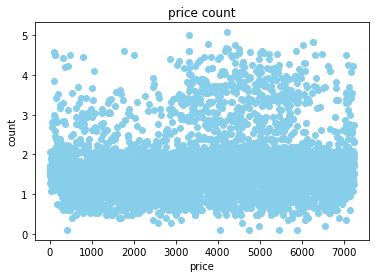

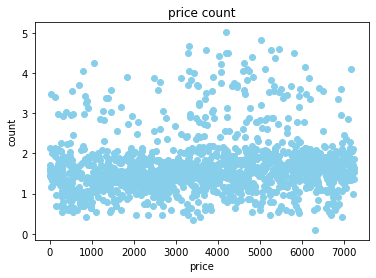

In [35]:
for y in [y_train_log,y_val_log]:
    plt.Figure(figsize=(50,25))
    plt.plot(y,'o', color = 'skyblue')
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title('price count')
    plt.show()

# Model selection

In [36]:
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer, mean_squared_error

In [37]:
# params_grid 
XGB =  {'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        }

LR_grid =  {}


RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

Ridge_grid = {'alpha': [0.1, 1, 10, 100]}


In [38]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge


models = {
    "XGB": XGBRegressor(),
    # "LR": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=0),
    "Ridge":Ridge()
}

params_grid = {
    "XGB": XGB,
    # "LR": LR_grid,
    "RandomForest": RF_grid,
    "Ridge":Ridge_grid
}

best_models_result = []

# 定義評估指標（均方誤差）和超參數範圍
scorer = make_scorer(mean_squared_error, greater_is_better=False)

for key, classifier in models.items():
    print(f'Running: {key} model')
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=classifier, param_grid=params_grid[key], cv=5, scoring=scorer)
    grid_result = grid_search.fit(X_train, y_train_log)

    # Get the best model and its score
    best_model = grid_result.best_estimator_
    best_score = grid_result.best_score_

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Evaluate the model performance
    mse = mean_squared_error(y_val_log, y_pred)
    unlog_mse = mean_squared_error(y_val,np.exp(y_pred))
    r2 = r2_score(y_val_log, y_pred)

    best_models_result.append([best_model, best_score, mse, r2])

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", best_score)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Squared Error (MSE unlog): {unlog_mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}\n")


Running: XGB model
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best Score: -0.09112607192626945
Mean Squared Error (MSE): 0.1037
Mean Squared Error (MSE unlog): 36.8119
R-squared (R2): 0.7971

Running: RandomForest model
Best Parameters: {'max_depth': 12, 'n_estimators': 300}
Best Score: -0.10040064018903978
Mean Squared Error (MSE): 0.1058
Mean Squared Error (MSE unlog): 38.2274
R-squared (R2): 0.7929

Running: Ridge model
Best Parameters: {'alpha': 0.1}
Best Score: -0.14455116939960416
Mean Squared Error (MSE): 0.1579
Mean Squared Error (MSE unlog): 814.1251
R-squared (R2): 0.6910



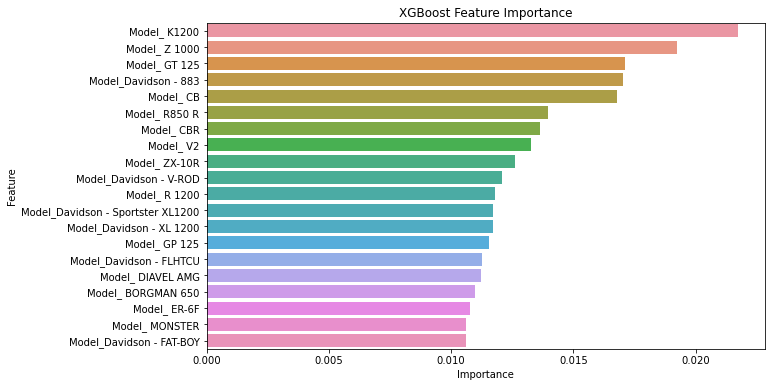

In [33]:
# 創建一個 DataFrame 來存放特徵名稱和對應的重要性
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance':best_models_result[0][0].feature_importances_})

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[0:20]

# 繪製條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()